## **Objective**
The primary objective of this project is to develop a predictive model that can accurately identify fraudulent transactions within financial data. This model will assist in enhancing the security measures of financial institutions by proactively detecting and preventing potential fraud. The success of this project will be measured by the model's accuracy, precision, recall, and F1 score, ensuring that it effectively minimizes false positives and false negatives to protect both the institution and its customers.

# **Data Collection Process**
For this project, the Fraudulent Transaction Dataset will be utilized. This dataset contains over 6 million entries, each representing a transaction with detailed information, making it well-suited for training a robust machine learning model to recognize patterns indicative of fraud.

**Details of the Data Collection Process:**

**Source:** The dataset is sourced from kaggle, A comprehensive database of financial transactions, compiled to facilitate the development of fraud detection algorithms.

**Contents:** Each entry in the dataset includes several features crucial for analysis, such as:

step - a time unit representing the time of the transaction
type - the category of the transaction (e.g., payment, transfer)
amount - the monetary value of the transaction
nameOrig - the identifier for the origin account
oldbalanceOrg - the initial balance before the transaction
newbalanceOrig - the new balance after the transaction
nameDest - the identifier for the destination account
oldbalanceDest - the destination account's balance before the transaction
new (balanceDest) - the balance after the transaction
isFraud - a binary flag indicating a fraudulent transaction
isFlaggedFraud - a binary flag indicating a transaction flagged as suspicious.

*   step - a time unit representing the time of the transaction
*   type - the category of the transaction (e.g., payment, transfer)
amount - the monetary value of the transaction

*   amount - the monetary value of the transaction
*   nameOrig - the identifier for the origin account
*   oldbalanceOrg - the initial balance before the transaction
*   newbalanceOrig - the new balance after the transaction
*   nameDest - the identifier for the destination account
*   oldbalanceDest - the destination account's balance before the transaction
*   new (balanceDest) - the balance after the transaction
*   isFraud - a binary flag indicating a fraudulent transaction
*   isFlaggedFraud - a binary flag indicating a transaction flagged as suspicious.





# **Data Integrity and Privacy:**
All data has been anonymized to protect customer privacy, with identifiers that do not reveal real account holders.
Accessibility: The dataset is readily available for download from a specified URL, ensuring that researchers can easily access and utilize the data for model training and testing.

In [169]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from pandas.plotting import parallel_coordinates
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

In [170]:
df = pd.read_csv('/Users/saa384/Downloads/Transaction_Fraud/Transactions Data.csv')
df.head

<bound method NDFrame.head of          step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1  

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


**Summary statistics for numerical features**

In [172]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


**Check for missing values**

In [173]:
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


# **Exploratory Data Analysis**

0 depicts Non-fraudlent, 1 depicts fraudlent The above shows that they were  6354407 Non-fraudlent Transactions and 8213 Fraudkent transaction.

In [174]:
print("\nDistribution of the 'isFraud' target variable:")
print(df['isFraud'].value_counts())


Distribution of the 'isFraud' target variable:
isFraud
0    6354407
1       8213
Name: count, dtype: int64


In [175]:
print("\nDistribution of transaction types:")
print(df['type'].value_counts())


Distribution of transaction types:
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


Visualizations

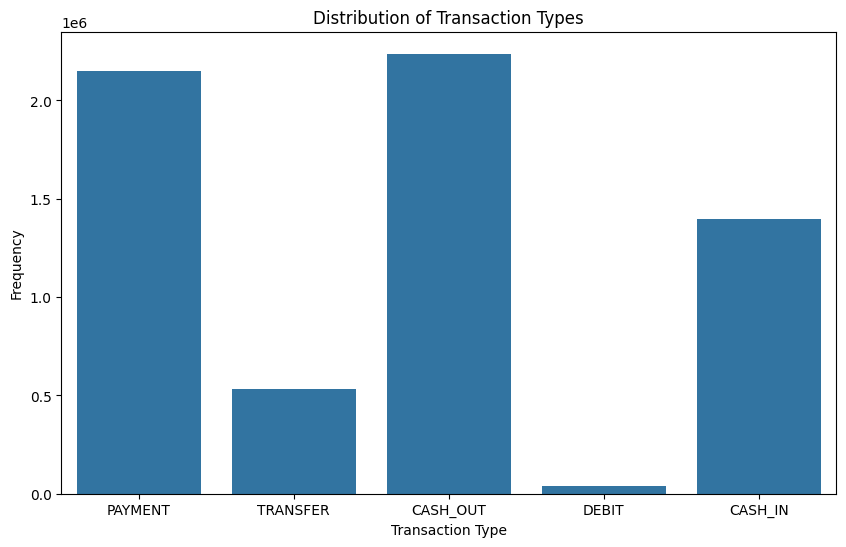

In [176]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df)
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Frequency')
plt.show()

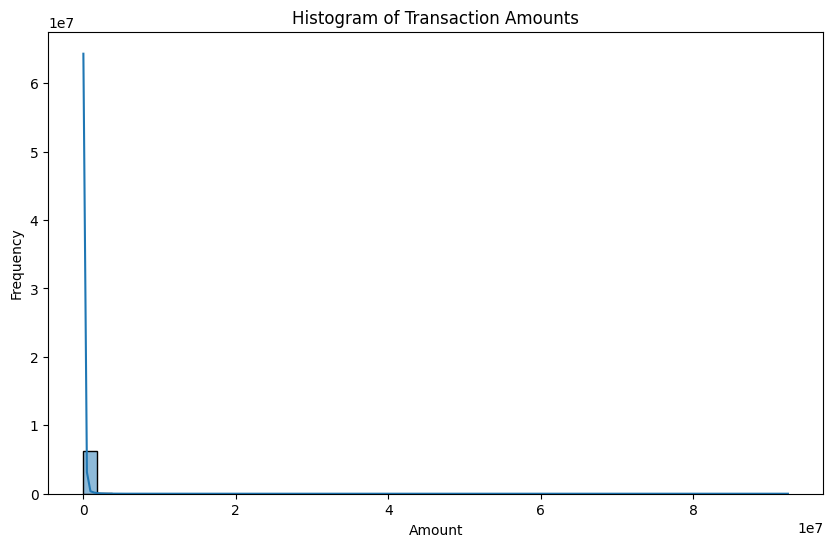

In [177]:
plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], bins=50, kde=True)
plt.title('Histogram of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

/var/folders/1p/xj898v715rz9l9z0_kpn0bbh6vp515/T/ipykernel_20796/944050136.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Non-Fraudulent', 'Fraudulent'])


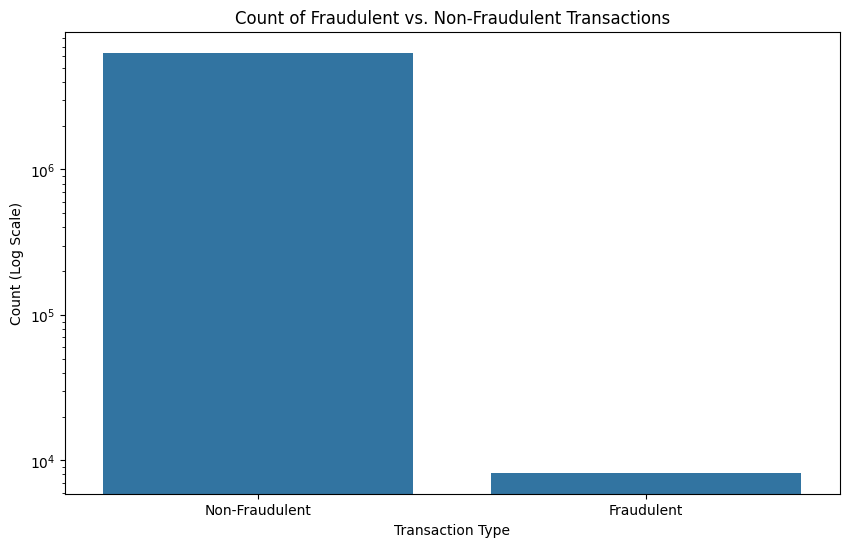

In [178]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='isFraud', data=df)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count (Log Scale)')
plt.yscale('log')  # Set the y-axis to a logarithmic scale
ax.set_xticklabels(['Non-Fraudulent', 'Fraudulent'])
plt.show()

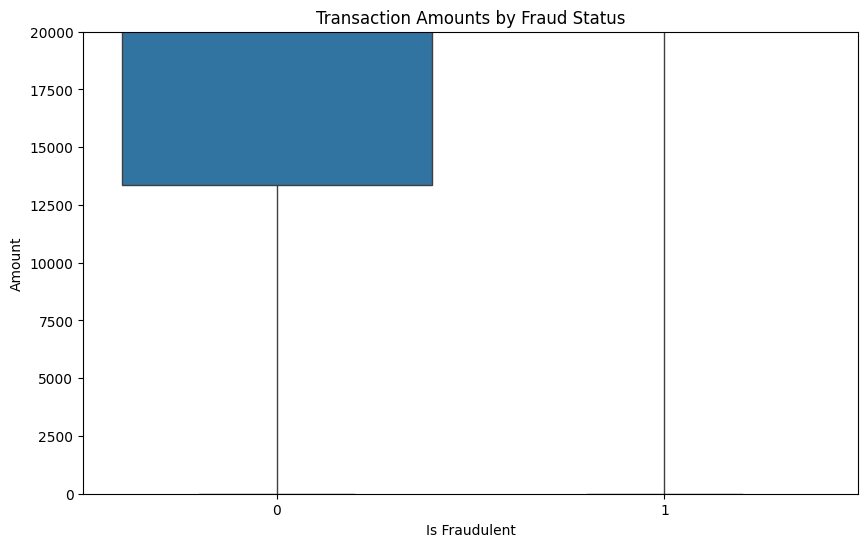

In [179]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title('Transaction Amounts by Fraud Status')
plt.xlabel('Is Fraudulent')
plt.ylabel('Amount')
plt.ylim(0, 20000)  # Limiting amount range for better visualization
plt.show()

/var/folders/1p/xj898v715rz9l9z0_kpn0bbh6vp515/T/ipykernel_20796/95844866.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate labels if needed for better readability


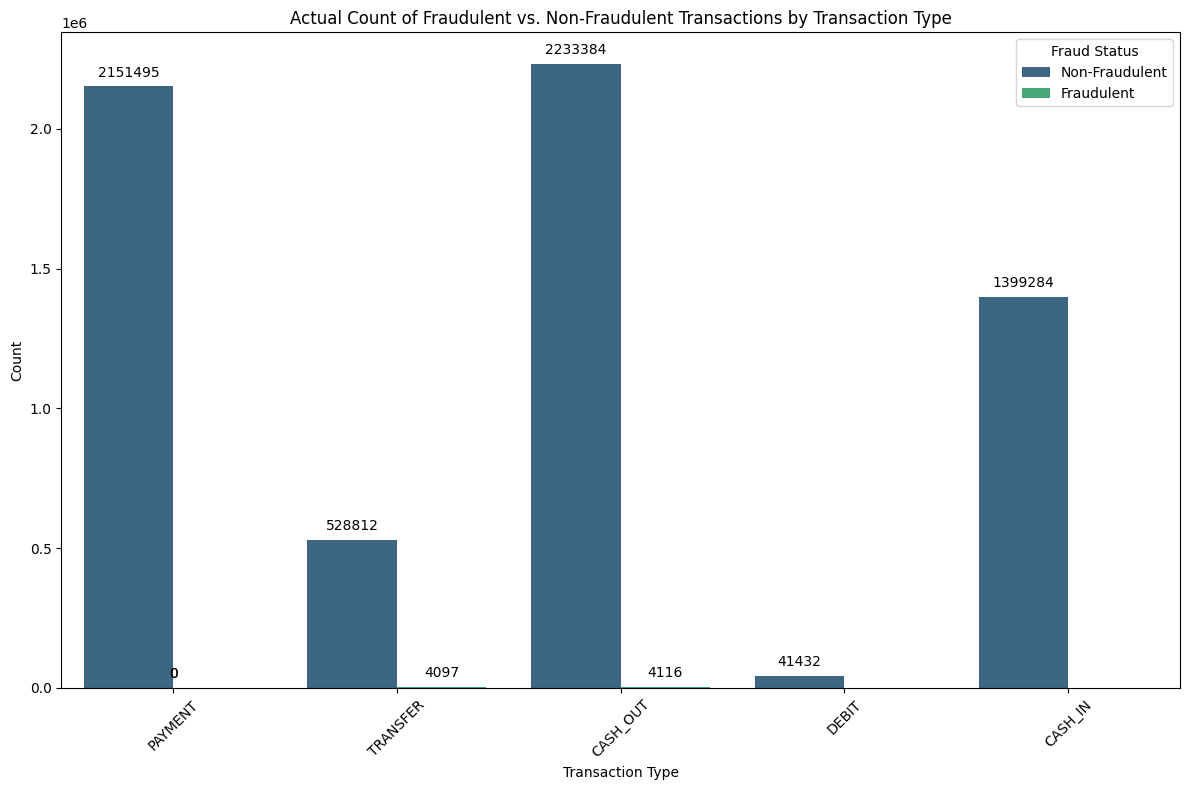

In [180]:
df_filtered = df[['type', 'isFraud']]

# Creating the plot
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='type', hue='isFraud', data=df_filtered, palette='viridis')

# Adding titles and labels
plt.title('Actual Count of Fraudulent vs. Non-Fraudulent Transactions by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate labels if needed for better readability

# Adding annotations to show counts above bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center',
                va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

# Showing the plot
plt.tight_layout()
plt.legend(title='Fraud Status', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

In [181]:
comparison = pd.crosstab(df['isFraud'], df['isFlaggedFraud'], rownames=['Actual Fraud'], colnames=['Flagged Fraud'])
print(comparison)

Flagged Fraud        0   1
Actual Fraud              
0              6354407   0
1                 8197  16


**Understanding the Output:**

Flagged Fraud = 0 and Actual Fraud = 0: 6,354,407 transactions were not flagged as fraudulent and are indeed not fraudulent.
Flagged Fraud = 0 and Actual Fraud = 1: 8,197 transactions were not flagged as fraudulent but are actually fraudulent.
Flagged Fraud = 1 and Actual Fraud = 1: Only 16 transactions were flagged as potentially fraudulent and are actually fraudulent.
Key Insights:
Low Sensitivity: The flagging mechanism (isFlaggedFraud) appears to have very low sensitivity, as it identified only 16 out of 8,213 actual fraudulent transactions. This indicates a potential issue with the flagging system's ability to detect true positives (actual fraud).

High Specificity: Since there are no false positives (transactions that are flagged as fraudulent but are not), the system is highly specific but at the cost of missing nearly all fraudulent transactions.



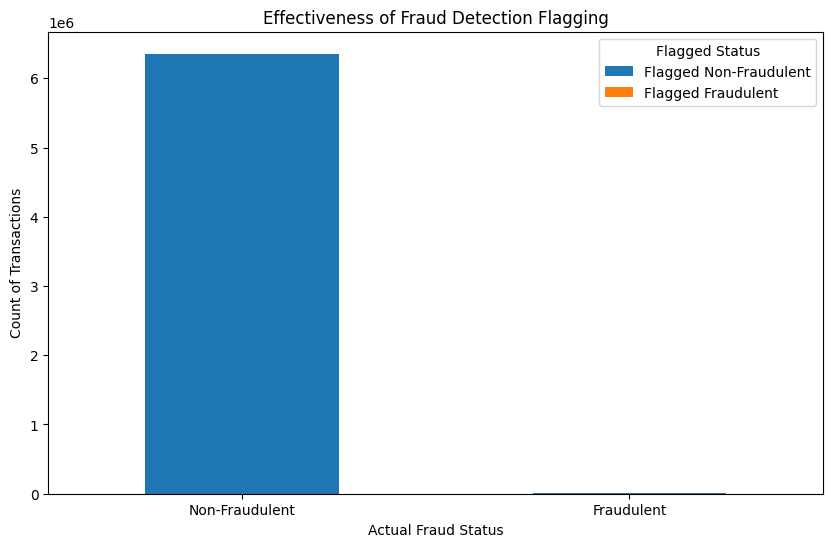

In [182]:
data = {
    'Flagged Non-Fraudulent': [6354407, 8197],
    'Flagged Fraudulent': [0, 16]
}
index = ['Non-Fraudulent', 'Fraudulent']
df_plot = pd.DataFrame(data, index=index)

# Bar plot for visualization
df_plot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Effectiveness of Fraud Detection Flagging')
plt.xlabel('Actual Fraud Status')
plt.ylabel('Count of Transactions')
plt.xticks(rotation=0)
plt.legend(title='Flagged Status')
plt.show()

The plot above visually emphasize how few fraudulent transactions are correctly flagged, underscoring the need for system improvements.

Quantitative correlation between the trasactions that are fraudulent and those that are actually fraudulent

The above shows a 0.04 correlation indicating a very weak positive linear relationship between the flagging status of a transaction as potentially fraudulent and its actual status as fraudulent.

In [183]:
correlation = df['isFraud'].corr(df['isFlaggedFraud'])
print("Correlation between 'isFlaggedFraud' and 'isFraud':", correlation)

Correlation between 'isFlaggedFraud' and 'isFraud': 0.044109196513820205


# **Building the Models**

**Importing Libraries**

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

**Data cleaning and preprocessing**

In [185]:
df.fillna(method='ffill', inplace=True)
encoder = LabelEncoder()
df['type'] = encoder.fit_transform(df['type'])

/var/folders/1p/xj898v715rz9l9z0_kpn0bbh6vp515/T/ipykernel_20796/2533997903.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [186]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


**Feature selection**

In [187]:
X = df[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
y = df['isFraud']

**Data splitting**

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Checking the value count of our our target variable - isFraud

The output shows that our dataset indicates a highly imbalanced dataset, with 5,835,003 transactions labeled as not fraudulent ('0') and only 6,593 transactions labeled as fraudulent ('1'). This imbalance can present challenges when training machine learning models, as models might become biased towards predicting the majority class (non-fraudulent transactions), potentially ignoring the minority class (fraudulent transactions)

In [189]:
print('Before SMOTE:', y_train.value_counts())

Before SMOTE: isFraud
0    5083503
1       6593
Name: count, dtype: int64


Using SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic examples rather than over-sampling with replacement. To balance the number count of our traget variable

In [190]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print('Before SMOTE:', y_train.value_counts())
print('After SMOTE:', y_train_smote.value_counts())

Before SMOTE: isFraud
0    5083503
1       6593
Name: count, dtype: int64
After SMOTE: isFraud
0    5083503
1    5083503
Name: count, dtype: int64


# **Random Forest**

In [191]:
RF_model = RandomForestClassifier(n_estimators=100, random_state=42)
RF_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [192]:
RF_predictions = RF_model.predict(X_test)

In [193]:
conf_matrix = confusion_matrix(y_test, RF_predictions)

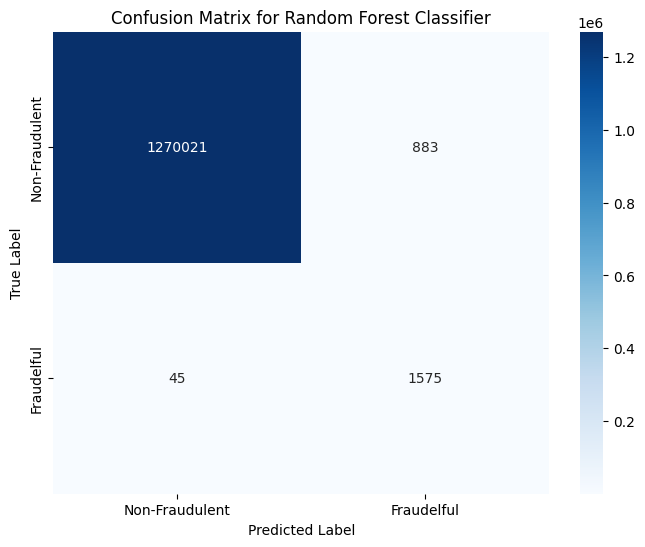

In [194]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Fraudulent', 'Fraudelful'], 
            yticklabels=['Non-Fraudulent', 'Fraudelful'])
plt.title('Confusion Matrix for Random Forest Classifier')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [195]:
print(classification_report(y_test, RF_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.64      0.97      0.77      1620

    accuracy                           1.00   1272524
   macro avg       0.82      0.99      0.89   1272524
weighted avg       1.00      1.00      1.00   1272524



In [204]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, make_scorer, f1_score

Applying  Threshold Tuning to improve the Model

Best Threshold=0.96, F-Score=0.8958990536277602
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.92      0.88      0.90      1620

    accuracy                           1.00   1272524
   macro avg       0.96      0.94      0.95   1272524
weighted avg       1.00      1.00      1.00   1272524



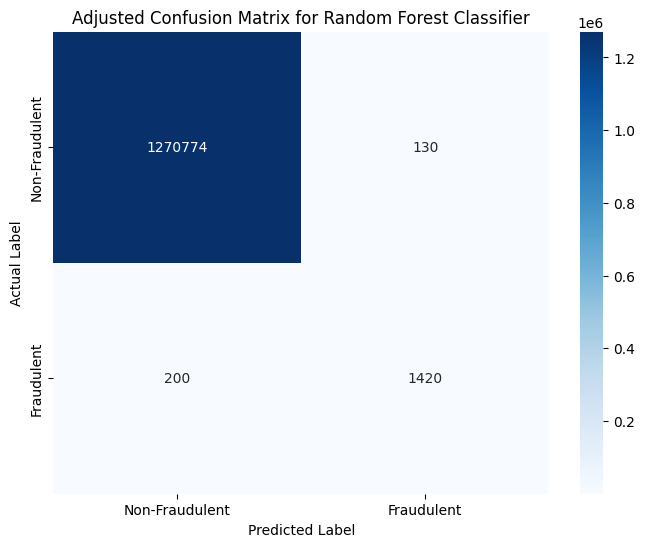

In [202]:
probabilities = RF_model.predict_proba(X_test)[:, 1]  # Getting the probability for the positive class

# Calculate precision, recall, and thresholds from the probabilities
precision, recall, thresholds = precision_recall_curve(y_test, probabilities)

# Find the optimal threshold (where F-score is maximized)
fscore = (2 * precision * recall) / (precision + recall)
ix = np.argmax(fscore)
best_threshold = thresholds[ix]

print(f"Best Threshold={best_threshold}, F-Score={fscore[ix]}")

# Apply the best threshold to adjust predictions
adjusted_predictions = (probabilities >= best_threshold).astype(int)

# Print adjusted classification report
print(classification_report(y_test, adjusted_predictions))

# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test, adjusted_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Fraudulent', 'Fraudulent'], 
            yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.title('Adjusted Confusion Matrix for Random Forest Classifier')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

**Given the above, it might be beneficial to visualize the precision-recall curve to see the trade-off that led to selecting the best threshold:**

**Visualize the Precision-Recall Curve**

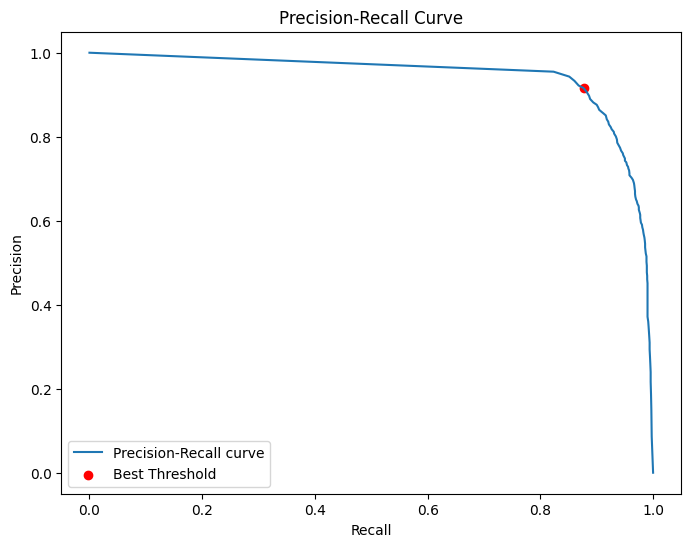

In [201]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.scatter(recall[ix], precision[ix], marker='o', color='red', label='Best Threshold')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

The Above shows that the Threshold of 0.96 provides the best balance for my model between precision and recall, this adjustment can greatly affect how the model will perform in a real-world setting, especially in terms of reducing false positives without losing many true positives.

# **XGBOOST**

In [205]:
from xgboost import XGBClassifier

In [206]:
XGmodel = XGBClassifier(scale_pos_weight=10)
XGmodel.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [207]:
Xgpredictions = XGmodel.predict(X_test)

In [208]:
conf_matrix_XG = confusion_matrix(y_test, Xgpredictions)

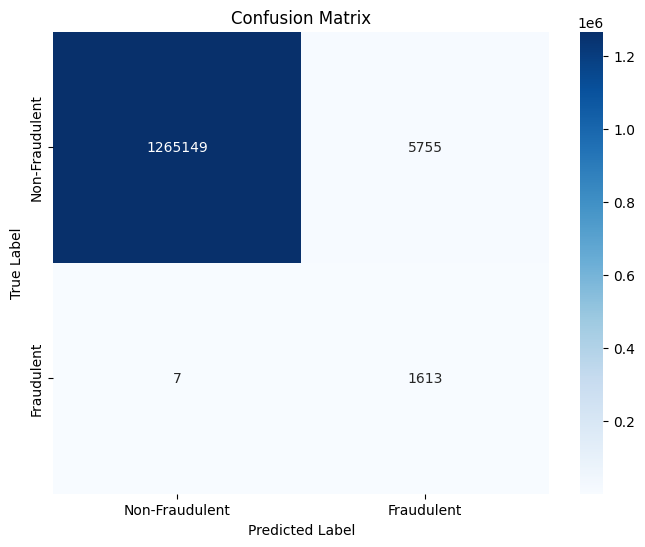

In [209]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_XG, annot=True, fmt="d", cmap='Blues', xticklabels=['Non-Fraudulent', 'Fraudulent'], yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [210]:
print(classification_report(y_test, Xgpredictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.22      1.00      0.36      1620

    accuracy                           1.00   1272524
   macro avg       0.61      1.00      0.68   1272524
weighted avg       1.00      1.00      1.00   1272524



Best Threshold=0.9994584918022156, F-Score=0.8421052631578947
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.87      0.81      0.84      1620

    accuracy                           1.00   1272524
   macro avg       0.94      0.91      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524



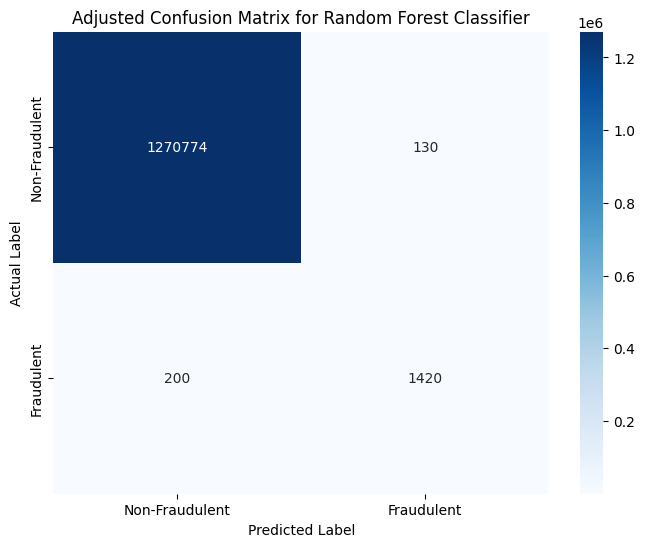

In [211]:
probabilities = XGmodel.predict_proba(X_test)[:, 1]  # Getting the probability for the positive class

# Calculate precision, recall, and thresholds from the probabilities
precision, recall, thresholds = precision_recall_curve(y_test, probabilities)

# Find the optimal threshold (where F-score is maximized)
fscore = (2 * precision * recall) / (precision + recall)
ix = np.argmax(fscore)
best_threshold = thresholds[ix]

print(f"Best Threshold={best_threshold}, F-Score={fscore[ix]}")

# Apply the best threshold to adjust predictions
adjusted_predictions = (probabilities >= best_threshold).astype(int)

# Print adjusted classification report
print(classification_report(y_test, adjusted_predictions))

# Confusion matrix visualization
XG_conf_matrix = confusion_matrix(y_test, adjusted_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Fraudulent', 'Fraudulent'], 
            yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.title('Adjusted Confusion Matrix for Random Forest Classifier')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

The Threshold Tuning has significantly improved the Precisio  recall and F1 Scores of the XGBoost Model

# **GradientBoostingClassifier**

In [212]:
from sklearn.ensemble import GradientBoostingClassifier

In [213]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

In [214]:
gb_model.fit(X_train_smote, y_train_smote)

In [ ]:
gb_predictions = gb_model.predict(X_test)

In [ ]:
print("Classification Report:\n", classification_report(y_test, gb_predictions))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99   1270904
           1       0.07      1.00      0.13      1620

    accuracy                           0.98   1272524
   macro avg       0.54      0.99      0.56   1272524
weighted avg       1.00      0.98      0.99   1272524



In [ ]:
b_conf_matrix = confusion_matrix(y_test, gb_predictions)


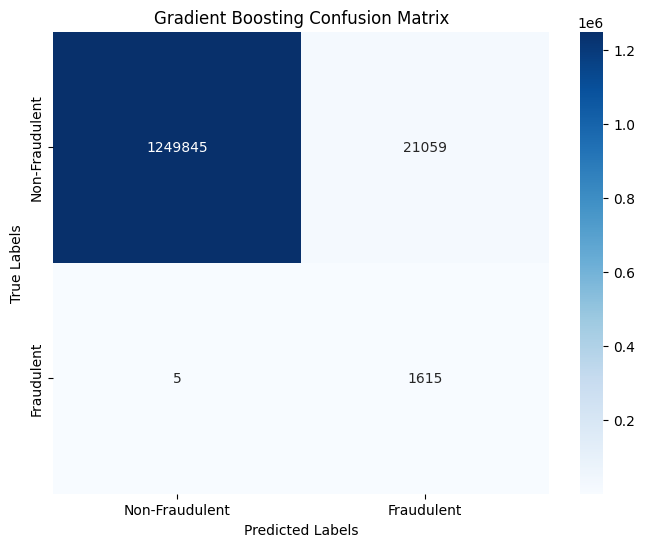

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(b_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraudulent', 'Fraudulent'],
            yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

Best Threshold=0.988974303701323, F-Score=0.8033298647242456
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.92      0.71      0.80      1620

    accuracy                           1.00   1272524
   macro avg       0.96      0.86      0.90   1272524
weighted avg       1.00      1.00      1.00   1272524



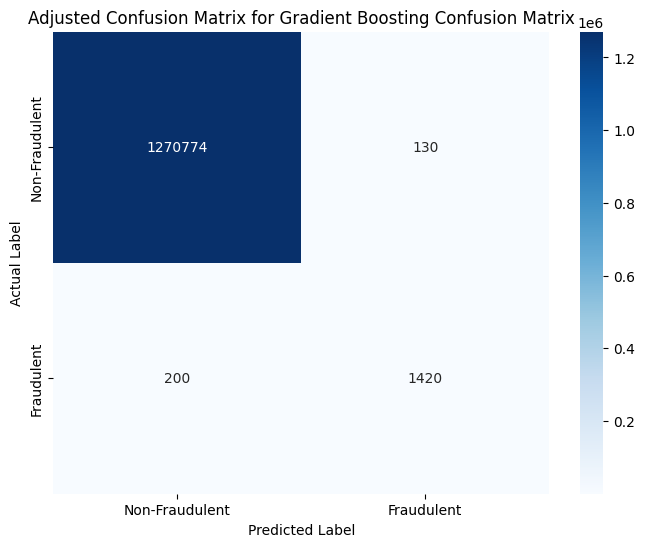

In [ ]:
probabilities = gb_model.predict_proba(X_test)[:, 1]  # Getting the probability for the positive class

# Calculate precision, recall, and thresholds from the probabilities
precision, recall, thresholds = precision_recall_curve(y_test, probabilities)

# Find the optimal threshold (where F-score is maximized)
fscore = (2 * precision * recall) / (precision + recall)
ix = np.argmax(fscore)
best_threshold = thresholds[ix]

print(f"Best Threshold={best_threshold}, F-Score={fscore[ix]}")

# Apply the best threshold to adjust predictions
adjusted_predictions = (probabilities >= best_threshold).astype(int)

# Print adjusted classification report
print(classification_report(y_test, adjusted_predictions))

# Confusion matrix visualization
b_conf_matrix = confusion_matrix(y_test, adjusted_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Fraudulent', 'Fraudulent'], 
            yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.title('Adjusted Confusion Matrix for Gradient Boosting Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()